In [5]:
import pandas as pd

df_f1_part1 = pd.read_csv('f1_part1.csv')
df_f1_part2 = pd.read_csv('f1_part2.csv')
df_f2_part1 = pd.read_csv('f2_part1.csv')
df_f2_part2 = pd.read_csv('f2_part2.csv')

comb = 0.00001
combined_df = pd.concat([df_f1_part1, df_f1_part2, df_f2_part1, df_f2_part2], ignore_index=True)

print("Columns of the combined DataFrame:")
print(combined_df.columns)

Columns of the combined DataFrame:
Index(['timestamp_call_key', 'retailer_code', 'serial', 'reason', 'mos',
       'resolved', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'delinquency_history_13_march',
       'account_open_date_13_march', 'account_status_13_march',
       'card_activation_status_13_march', 'eservice_ind_13_march',
       'ebill_enrolled_status_13_march', 'auto_pay_enrolled_status_13_march',
       'no_of_accounts_with_syf_18_march', 'account_balance_18_march',
       'delinquency_history_18_march', 'account_open_date_18_march',
       'account_status_18_march', 'card_activation_status_18_march',
       'eservice_ind_18_march', 'ebill_enrolled_status_18_march',
       'auto_pay_enrolled_status_18_march'],
      dtype='object')


In [6]:
combined_df["ebill_enrolled_status_13_march"].unique()

array(['E', ' ', 'L', 'D', 'B', nan], dtype=object)

In [7]:
combined_df.shape

(1798798, 24)

In [8]:


combined_df["account_balance_13_march"].fillna(0, inplace=True)


nan_counts = combined_df.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)


Number of NaN values in each column:
timestamp_call_key                         0
retailer_code                              0
serial                                     0
reason                                     0
mos                                        0
resolved                                   0
no_of_accounts_with_syf_13_march        3400
account_balance_13_march                   0
delinquency_history_13_march               0
account_open_date_13_march                 0
account_status_13_march              1732768
card_activation_status_13_march            0
eservice_ind_13_march                      0
ebill_enrolled_status_13_march          4936
auto_pay_enrolled_status_13_march          0
no_of_accounts_with_syf_18_march        3402
account_balance_18_march              101829
delinquency_history_18_march               0
account_open_date_18_march                 0
account_status_18_march              1703450
card_activation_status_18_march            0
eservice_ind_18_ma

In [9]:
combined_df["mos"].unique()
len(combined_df) - len(combined_df["serial"].unique())


290795

In [10]:
combined_df["delinquency_history_13_march"].unique()

array(['[00]', '[02]', '[03]', '[20]', '[32]', '[22]', '[43]', '[23]',
       '[54]', '[76]', '[07]', '[08]', '[88]', '[05]', '[56]', '[04]',
       '[06]', '[33]', '[25]', '[65]', '[34]', '[35]', '[48]', '[24]',
       '[87]', '[44]', '[55]', '[46]', '[47]', '[30]', '[66]', '[26]',
       '[58]', '[37]', '[68]', '[45]', '[57]', '[36]', '[77]', '[67]',
       '[78]', '[27]', '[40]', '[53]', '[42]'], dtype=object)

# EDA ON MOS

In [11]:
reason_codes = combined_df['mos'].str.split()

unique_reasons = set(reason for sublist in reason_codes for reason in sublist)


In [12]:
# for reason in unique_reasons:
#     combined_df[reason] = combined_df['mos'].str.contains(reason).astype(int)

# reason EDA

In [13]:
from scipy.stats import chi2_contingency

categorical_variable = combined_df['reason']
binary_variable = combined_df['resolved']

chi2, p_value_chi2, _, _ = chi2_contingency(pd.crosstab(categorical_variable, binary_variable))
print("Chi-square test p-value:", p_value_chi2)


Chi-square test p-value: 0.0


In [14]:

cross_tab = pd.crosstab(categorical_variable, binary_variable)

print("Contingency table (Cross-tabulation):")
print(cross_tab)

Contingency table (Cross-tabulation):
resolved   floor  resolved
reason                    
AA         15089     39772
AP          4541      2188
AT          8687     82717
AU             9         7
BA        158394    407957
...          ...       ...
mo             1         0
mp          5426      2188
mt             3         2
ss             1         0
wa         13248      1048

[73 rows x 2 columns]


In [15]:
data = combined_df[['reason', 'resolved']]

In [16]:
resolved_counts = data[data['resolved'] == 'resolved'].groupby('reason').size().reset_index(name='resolved_count')
unresolved_counts = data[data['resolved'] == 'floor'].groupby('reason').size().reset_index(name='unresolved_count')

print(resolved_counts)


   reason  resolved_count
0      AA           39772
1      AP            2188
2      AT           82717
3      AU               7
4      BA          407957
..    ...             ...
63     mm               1
64     mn            1226
65     mp            2188
66     mt               2
67     wa            1048

[68 rows x 2 columns]


In [17]:
combined_counts = pd.concat([resolved_counts.set_index('reason'), unresolved_counts.set_index('reason')], axis=1)
combined_counts.fillna(0, inplace=True)



KeyError: 'unresolved_to_total_ratio'

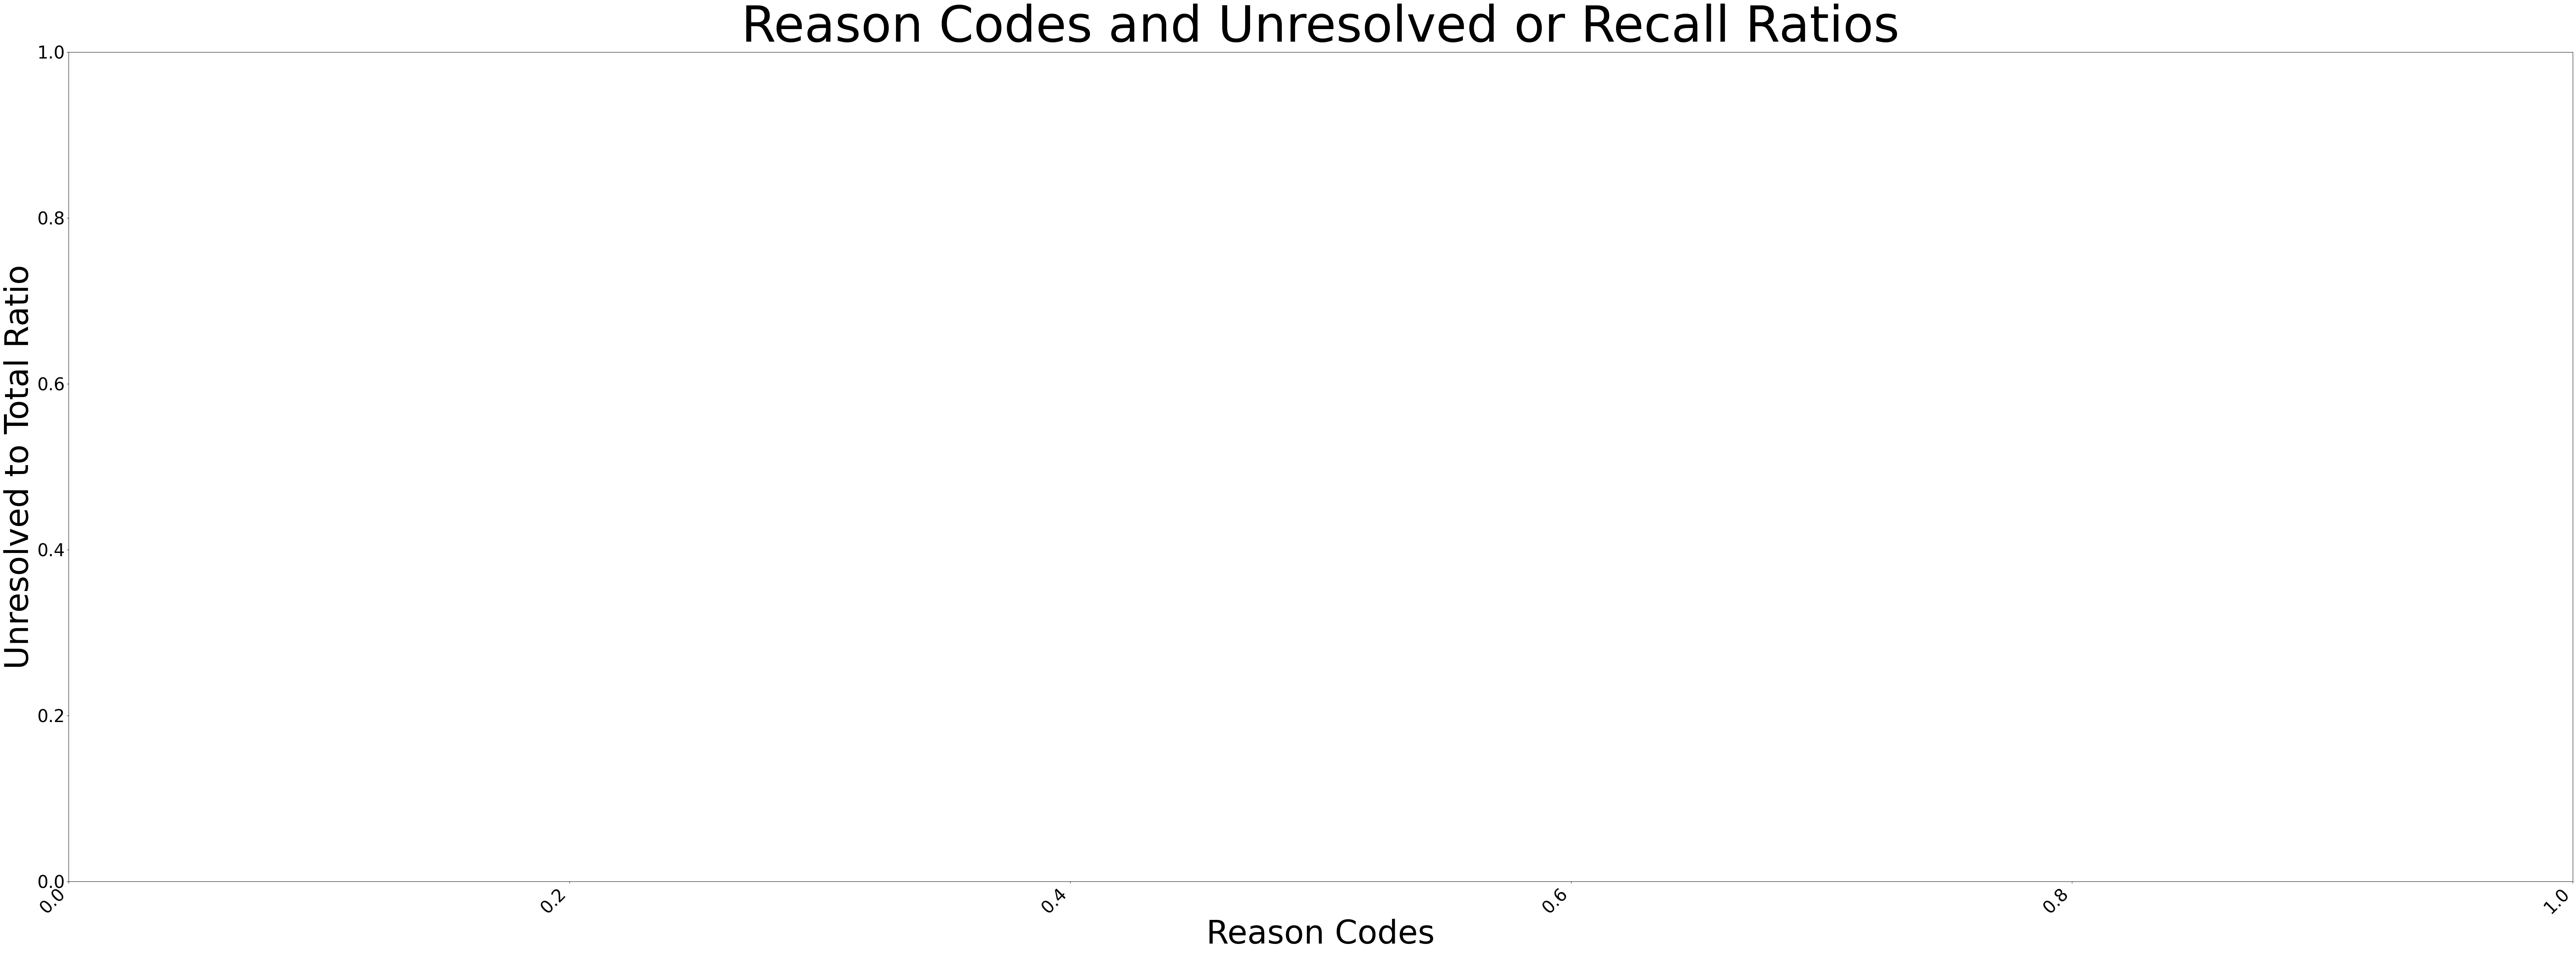

In [18]:
# import matplotlib.pyplot as plt
# num = 90
# plt.figure(figsize=(num, 20))
# plt.bar(combined_counts.index[:num], combined_counts['unresolved_to_total_ratio'][:num], width=0.6)  # Adjust the width as needed
# plt.xlabel('Reason Codes', fontsize=65)  # Increase the font size of xlabel
# plt.ylabel('Unresolved to Total Ratio', fontsize=65)  # Increase the font size of ylabel
# plt.title('Reason Codes and Unresolved or Recall Ratios', fontsize=100)  # Increase the font size of title
# plt.xticks(rotation=45, ha='right', fontsize=35)
# plt.yticks(fontsize=35)

# plt.show()


# import matplotlib.pyplot as plt
# import numpy as np

# num = 90
# plt.figure(figsize=(num, 20))
# bars = plt.bar(combined_counts.index[:num], combined_counts['unresolved_to_total_ratio'][:num], width=0.6)  # Adjust the width as needed
# plt.xlabel('Reason Codes', fontsize=65)  # Increase the font size of xlabel
# plt.ylabel('Unresolved to Total Ratio', fontsize=65)  # Increase the font size of ylabel
# plt.title('Reason Codes and Unresolved or Recall Ratios', fontsize=100)  # Increase the font size of title
# plt.xticks(rotation=45, ha='right', fontsize=35)
# plt.yticks(fontsize=35)

# # Applying colormap based on unresolved_count
# colors = plt.cm.viridis(combined_counts['unresolved_count'][:num] / max(combined_counts['unresolved_count'][:num]))
# for bar, color in zip(bars, colors):
#     bar.set_color(color)

# plt.show()

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

colors = [ (0.9,.9,0.9), (0.1, 0.1,0.1)] 

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=1024)  

num = 90
plt.figure(figsize=(num, 30))

plt.xlabel('Reason Codes', fontsize=65)
plt.ylabel('Unresolved to Total Ratio', fontsize=65)
plt.title('Reason Codes and Unresolved or Recall Ratios', fontsize=100)
plt.xticks(rotation=45, ha='right', fontsize=35)
plt.yticks(fontsize=35)


bars = plt.bar(combined_counts.index[:num], combined_counts['unresolved_to_total_ratio'][:num], width=0.6, color=custom_cmap(np.sqrt(np.sqrt(np.sqrt(combined_counts['unresolved_count'][:num] / max(combined_counts['unresolved_count'][:num]))))))


plt.show()


In [ ]:
combined_counts['unresolved_to_total_ratio'] = combined_counts['unresolved_count'] / (combined_counts['resolved_count'] + combined_counts['unresolved_count'])

print("Ratio of unresolved to total for each reason category:")
print(combined_counts)

Ratio of unresolved to total for each reason category:
        resolved_count  unresolved_count  unresolved_to_total_ratio
reason                                                             
AA             39772.0           15089.0                   0.275041
AP              2188.0            4541.0                   0.674840
AT             82717.0            8687.0                   0.095040
AU                 7.0               9.0                   0.562500
BA            407957.0          158394.0                   0.279675
...                ...               ...                        ...
HI                 0.0               1.0                   1.000000
NU                 0.0               2.0                   1.000000
RS                 0.0              72.0                   1.000000
mo                 0.0               1.0                   1.000000
ss                 0.0               1.0                   1.000000

[73 rows x 3 columns]


In [ ]:
combined_counts_sorted = combined_counts.sort_values(by='unresolved_to_total_ratio', ascending=False)

print("Sorted DataFrame by unresolved_to_total_ratio (descending):")
combined_counts_sorted.head(50)


Sorted DataFrame by unresolved_to_total_ratio (descending):


,resolved_count,unresolved_count,unresolved_to_total_ratio
reason,,,
ss,0.0,1.0,1.000000
NU,0.0,2.0,1.000000
mo,0.0,1.0,1.000000
RS,0.0,72.0,1.000000
HI,0.0,1.0,1.000000
DP,102.0,6828.0,0.985281
LW,1.0,57.0,0.982759
DE,7.0,275.0,0.975177
CS,2.0,69.0,0.971831


In [ ]:
unresolved_count_gt_4000 = combined_counts_sorted[(combined_counts_sorted['unresolved_count'] > 4000)]

print("Rows where unresolved_count is greater than 1000:")
unresolved_count_gt_4000.head(20)

Rows where unresolved_count is greater than 1000:


,resolved_count,unresolved_count,unresolved_to_total_ratio
reason,,,
DP,102.0,6828.0,0.985281
CT,714.0,23082.0,0.969995
FD,533.0,12474.0,0.959022
FM,300.0,4455.0,0.936909
wa,1048.0,13248.0,0.926693
LC,2494.0,7582.0,0.752481
mp,2188.0,5426.0,0.712635
LS,4283.0,9482.0,0.688849
Pd,2265.0,4860.0,0.682105


In [ ]:
reasons = unresolved_count_gt_4000.index

# general plots

# plots for resolved vs unresolved

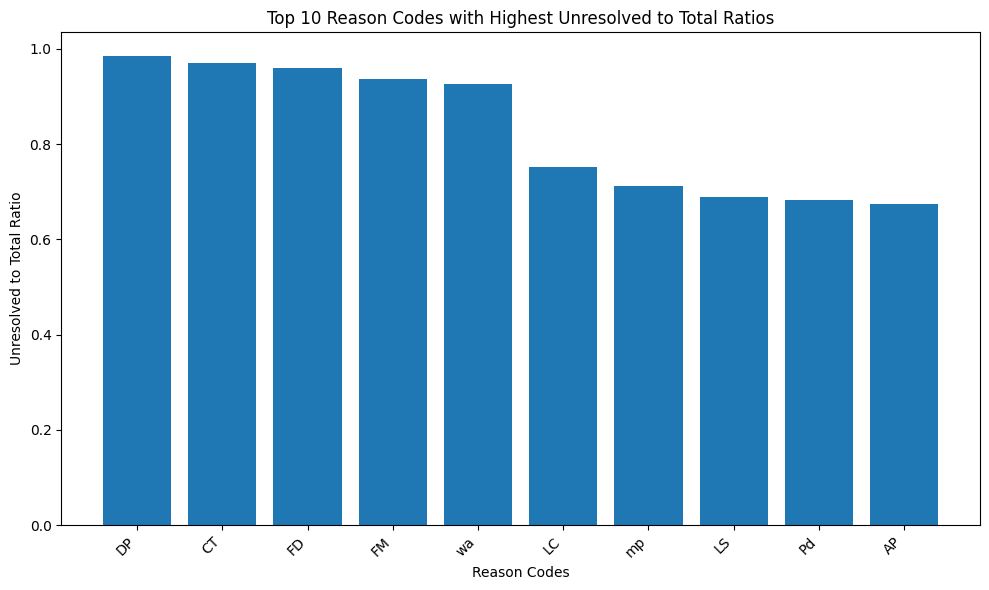

In [ ]:
import matplotlib.pyplot as plt

combined_counts_sorted_by_ratio = unresolved_count_gt_4000.sort_values(by='unresolved_to_total_ratio', ascending=False)

num = 10
plt.figure(figsize=(num, 6))
plt.bar(combined_counts_sorted_by_ratio.index[:num], combined_counts_sorted_by_ratio['unresolved_to_total_ratio'][:num])
plt.xlabel('Reason Codes')
plt.ylabel('Unresolved to Total Ratio')
plt.title('Top ' + str(num) + ' Reason Codes with Highest Unresolved to Total Ratios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


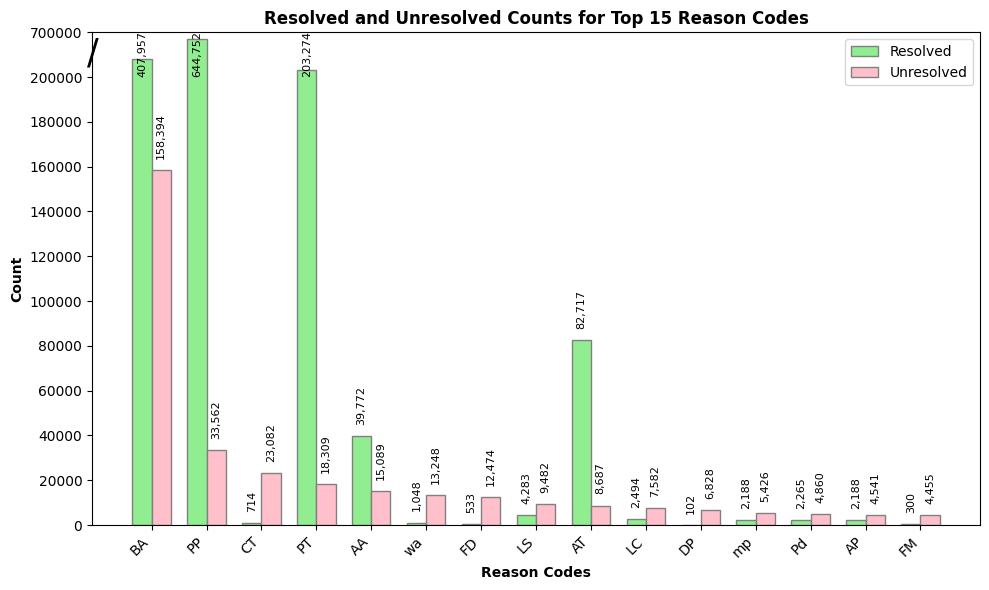

In [ ]:
'''import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by unresolved_count in descending order
combined_counts_sorted_by_count = unresolved_count_gt_4000.sort_values(by='unresolved_count', ascending=False)

# Number of reason codes to display
num_reason_codes = 15

# Extract reason codes and counts
reason_codes = combined_counts_sorted_by_count.index[:num_reason_codes]
resolved_counts = combined_counts_sorted_by_count['resolved_count'][:num_reason_codes]
unresolved_counts = combined_counts_sorted_by_count['unresolved_count'][:num_reason_codes]

# Set width of bars
bar_width = 0.35

# Set positions of bars on x-axis
r1 = np.arange(len(reason_codes))
r2 = [x + bar_width for x in r1]

# Plot bars
plt.figure(figsize=(10, 6))
bars2 = plt.bar(r1, resolved_counts, color='pink', width=bar_width, edgecolor='grey', label='Resolved')
bars = plt.bar(r2, unresolved_counts, color='orange', width=bar_width, edgecolor='grey', label='Unresolved')

# Set y-axis limit
plt.ylim(0, 200000)

# Add counts on top of each bar
for bar, count in zip(bars, unresolved_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, 1000, '{:,}'.format(int(count)), ha='center', va='bottom', rotation=-90, fontsize=8)

for bar, count in zip(bars2, resolved_counts):
    if int(count) > 200000:
        plt.text(bar.get_x() + bar.get_width() / 2, 175000, '...', ha='center', va='bottom', rotation=-90, fontsize=20)
    plt.text(bar.get_x() + bar.get_width() / 2, 1000, '{:,}'.format(int(count)), ha='center', va='bottom', rotation=-90, fontsize=8)



# Add xticks on the middle of the group bars
plt.xlabel('Reason Codes', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Resolved and Unresolved Counts for Top ' + str(num_reason_codes) + ' Reason Codes', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(reason_codes))], reason_codes, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
'''

import matplotlib.pyplot as plt
import numpy as np

combined_counts_sorted_by_count = unresolved_count_gt_4000.sort_values(by='unresolved_count', ascending=False)

num_reason_codes = 15

reason_codes = combined_counts_sorted_by_count.index[:num_reason_codes]
resolved_counts = combined_counts_sorted_by_count['resolved_count'][:num_reason_codes]
unresolved_counts = combined_counts_sorted_by_count['unresolved_count'][:num_reason_codes]

resolved_counts_v = resolved_counts.copy()
unresolved_counts_v = unresolved_counts.copy()
resolved_counts_v["BA"] = 208000
resolved_counts_v["PP"] = 217000

bar_width = 0.35

r1 = np.arange(len(reason_codes))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
bars2 = plt.bar(r1, resolved_counts_v, color='lightgreen', width=bar_width, edgecolor='grey', label='Resolved')
bars = plt.bar(r2, unresolved_counts_v, color='pink', width=bar_width, edgecolor='grey', label='Unresolved')

for bar, count in zip(bars, unresolved_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, min(200000, bar.get_height() + 5000), '{:,}'.format(int(count)), ha='center', va='bottom', rotation=90, fontsize=8)

for bar, count in zip(bars2, resolved_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, min(200000, bar.get_height() + 5000), '{:,}'.format(int(count)), ha='center', va='bottom', rotation=90, fontsize=8)

plt.ylim(0, max(unresolved_counts) + 10000)

ticks = [0, 20000, 40000, 60000,80000,100000,120000,140000,160000 ,180000, 200000,220000]
plt.yticks(ticks, [str(i) if i != 220000 else "700000" for i in ticks])

plt.xlabel('Reason Codes', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Resolved and Unresolved Counts for Top ' + str(num_reason_codes) + ' Reason Codes', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(reason_codes))], reason_codes, rotation=45, ha='right')
plt.legend()

plt.text(-1, 206000, "/", fontsize=25)

plt.tight_layout()
plt.show()




# Associations With Reason

In [ ]:
df = combined_df.copy()

In [ ]:
for reason in reasons:
    df[f'{reason}_flag'] = (df['reason'] == reason).astype(int)


In [ ]:
df['acc_changed_flag'] = combined_df['no_of_accounts_with_syf_13_march'] != combined_df['no_of_accounts_with_syf_18_march']

In [ ]:
df['card_activation_changed'] = combined_df['card_activation_status_13_march'] != combined_df['card_activation_status_18_march']

In [ ]:
df['delinquency_changed'] = combined_df['delinquency_history_13_march'] != combined_df['delinquency_history_18_march']

In [ ]:
df['balance_increased'] = combined_df['account_balance_13_march'] > combined_df['account_balance_18_march']

In [ ]:
df['delinquent'] = (combined_df['delinquency_history_18_march'] != 'ApplePie') & ([True if int(i[1:-1]) > 10 else False for i in combined_df['delinquency_history_13_march']]) & ([True if int(i[1:-1]) > 10 else False for i in combined_df['delinquency_history_18_march']]) 

In [ ]:
df['interaction_terms'] = (df['acc_changed_flag'] | df['card_activation_changed'] | df['balance_increased'])

In [ ]:
cols = ['retailer_code', 'serial', 'reason', 'mos',
       'resolved', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'delinquency_history_13_march',
       'account_open_date_13_march', 'account_status_13_march',
       'card_activation_status_13_march', 'eservice_ind_13_march',
       'ebill_enrolled_status_13_march', 'auto_pay_enrolled_status_13_march',
       'no_of_accounts_with_syf_18_march', 'account_balance_18_march',
       'delinquency_history_18_march', 'account_open_date_18_march',
       'account_status_18_march', 'card_activation_status_18_march',
       'eservice_ind_18_march', 'ebill_enrolled_status_18_march',
       'auto_pay_enrolled_status_18_march']

for col in cols:
    df[col] = combined_df[col]

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.utils import resample

def cramers_v(x, y):
    """
    Calculate Cramer's V for two categorical variables.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    v_square = pow(chi2 / (n * min_dim), .5)
    
    return np.sqrt(v_square)

In [ ]:
def calculate_cramers_v(reason, predictor):
    positive_samples = df[df[predictor] == True]
    negative_samples = df[df[predictor] == False]
    
    minority_class_size = min(len(positive_samples), len(negative_samples))
    positive_downsampled = resample(positive_samples, replace=False, n_samples=minority_class_size)
    negative_downsampled = resample(negative_samples, replace=False, n_samples=minority_class_size)
    
    balanced_data = pd.concat([positive_downsampled, negative_downsampled])
    
    cramer_v_score = cramers_v(balanced_data[f'{reason}_flag'], balanced_data[predictor])
    
    return cramer_v_score


In [ ]:
fixed_attributes = ['delinquent', 'balance_increased', 'card_activation_changed', 'acc_changed_flag','delinquency_changed']

In [ ]:
heatmap_data = pd.DataFrame(index=reasons)

for predictor in fixed_attributes:
    cramer_v_scores = []
    for reason in reasons:
        cramer_v_score = calculate_cramers_v(reason, predictor)
        cramer_v_scores.append(cramer_v_score)\
        
    heatmap_data[predictor] = cramer_v_scores

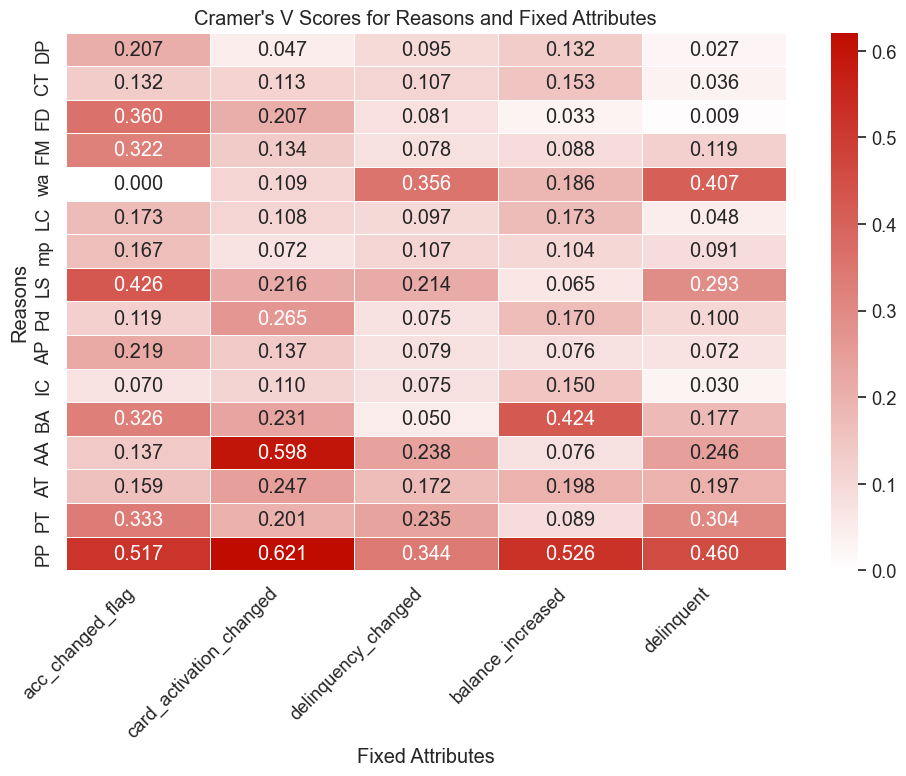

In [ ]:
import matplotlib.colors as mcolors
import seaborn as sns

colors = ["#FFFFFF", "#c00c00"]

custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt=".3f", linewidths=0.5)
plt.title("Cramer's V Scores for Reasons and Fixed Attributes")
plt.xlabel("Fixed Attributes")
plt.ylabel("Reasons")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
fixed_attributes2 = fixed_attributes.copy()

# model building 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

run = True
target = "PP_flag"

X = df[fixed_attributes2]
y = df[target]  

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

if run == True: X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=comb, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.56      0.83      0.67         6

    accuracy                           0.64        14
   macro avg       0.68      0.67      0.64        14
weighted avg       0.70      0.64      0.64        14



# Draw the Classification Summary Table using MatPlotLib

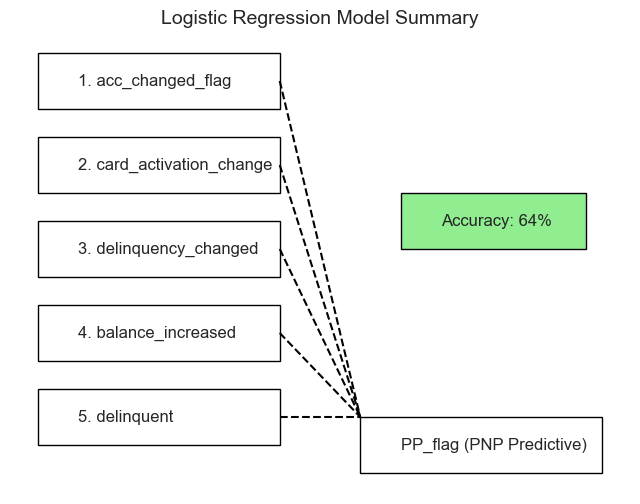

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

features = [ "acc_changed_flag",'card_activation_change','delinquency_changed', 'balance_increased' , 'delinquent']
prediction = 'PP_flag (PNP Predictive)'

plt.figure(figsize=(8, 6))

for i, feature in enumerate(features):
    rect = Rectangle((0, 0.9 - i * 0.15), 0.3, 0.1, linewidth=1, edgecolor='black', facecolor='none')
    plt.gca().add_patch(rect)
    plt.text(0.05, 0.95 - i * 0.15, f'{i + 1}. {feature}', fontsize=12, ha='left', va='center')

rect_output = Rectangle((0.4, 0.25), 0.3, 0.1, linewidth=1, edgecolor='black', facecolor='none')
plt.gca().add_patch(rect_output)
plt.text(0.45, 0.3, prediction, fontsize=12, ha='left', va='center')

for i in range(len(features)):
    plt.plot([0.3, 0.4], [0.95 - i * 0.15, 0.35], color='black', linestyle='--')

rect_accuracy = Rectangle((0.45, 0.65), 0.23, 0.1, linewidth=1, edgecolor='black', facecolor='lightgreen')
plt.gca().add_patch(rect_accuracy)
plt.text(0.5, 0.7, 'Accuracy: 64%', fontsize=12, ha='left', va='center')

plt.axis('off')

plt.title('Logistic Regression Model Summary', fontsize=14)

plt.show()

# mos analysis

In [ ]:
combined_df["mos"].unique()

array(['IA PP TR', 'IA BA TS nl TR', 'IA AA BA MR nl PT TR', ...,
       'mn IA IA PI BA TS nl RC nl TR',
       'mn IA PP BA MR nl WA nl BA nl mt',
       'IA AA BA TS nl LS nl nl LS TR'], dtype=object)

In [ ]:
import pandas as pd

mos_values = combined_df["mos"]

ba_counts_per_row = [mos.split().count("BA") for mos in mos_values]

result_df = pd.DataFrame({"mos": mos_values, "BA_Count": ba_counts_per_row})

print(result_df["BA_Count"].unique())

[0 1 2 3 4 5]


In [ ]:
ba_count_unique_counts = result_df["BA_Count"].value_counts()

print(ba_count_unique_counts)

BA_Count
1    1027444
0     744015
2      25506
3       1648
4        176
5          9
Name: count, dtype: int64


In [ ]:
combined_df["BA_Count"] = result_df["BA_Count"]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

combined_df["resolved_numeric"] = combined_df["resolved"].apply(lambda x: 1 if x == "resolved" else 0)

minority_class = combined_df[combined_df["BA_Flag"] == 0]
majority_class = combined_df[combined_df["BA_Flag"] == 1]

majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

balanced_df = pd.concat([majority_downsampled, minority_class])

correlation =np.sqrt( -(balanced_df["BA_Count"]).corr(balanced_df["resolved_numeric"]))

print("Correlation between BA_Flag and resolved_numeric after balancing classes:", correlation)

Correlation between BA_Flag and resolved_numeric after balancing classes: 0.4779434412112371
